# <center>Noto 7.5 Mw 2024 Earthquake Project</center>
<center>by: Haidir Jibran</center>
<center>haidirjibran@gmail.com</center>

Noto 4.5 Mw 2024 merupakan gempa bumi besar yang sangat merusak diwilayah utara kepulauan jepang.......

<b>1. Import Module and Library</b>

In [33]:
import os
import tqdm
import warnings
import pandas as pd
from glob import glob
import seismosocialdistancing

import matplotlib.pyplot as plt
import matplotlib.image as img

from obspy import UTCDateTime
from obspy import read
from obspy.clients.fdsn import Client
from obspy.clients.fdsn.client import FDSNNoDataException
from obspy.signal import PPSD

In [3]:
eventlatitude = 37.488
eventlongitude = 137.217
eventtime = UTCDateTime('2024-01-01T16:10:00+09')

1 Event(s) in Catalog:
2024-01-01T07:10:09.474000Z | +37.489, +137.264 | 7.5  mww


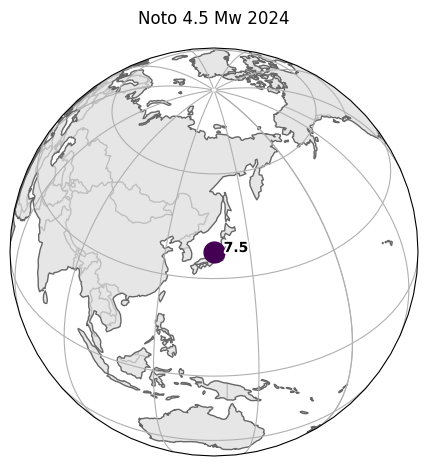

[Origin(resource_id=ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=49462969"), time=UTCDateTime(2024, 1, 1, 7, 10, 9, 474000), longitude=137.2638, latitude=37.4893, depth=10000.0, creation_info=CreationInfo(author='pt,at,us'))]


In [4]:
client = Client('IRIS')
event = client.get_events(starttime=eventtime-10, endtime=eventtime+10, longitude=eventlongitude, latitude=eventlatitude, maxradius=0.5)
print(event)
event.plot(projection='ortho', title="Noto 4.5 Mw 2024")
plt.close()

print(event[0].origins)

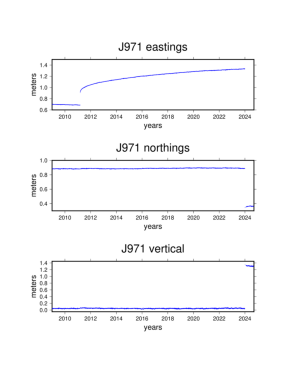

In [8]:
os.system('gmt gmtset PS_PAGE_ORIENTATION = portrait') # set paper orientation
os.system('gmt gmtset PS_MEDIA = letter') # set paper size
os.system('gmt gmtset PROJ_LENGTH_UNIT = inch') # set which unit that we use

# plot easting component
os.system("gmt psbasemap -JX6/1.5 -R2009/2024.7/0.6/1.5 -Ba2:years:/a0.2:meters::.'J971 eastings':WeSn -X1.25 -Y8 -K > ./postscript/plot_gps.ps") # define range of border, range of axis, marker, title, and position of baseplot on the paper
os.system("awk 'NR>1{print $3,$9}' ./data/J971.EU.tenv3 | gmt psxy -J -R -Sc0.01 -Gblue -O -K >> ./postscript/plot_gps.ps") # plot the scatter of data
\
# plot northing component
os.system("gmt psbasemap -JX6/1.5 -R2009/2024.7/0.3/1.0 -Ba2:years:/a0.2:meters::.'J971 northings':WeSn -X0 -Y-3 -O -K >> ./postscript/plot_gps.ps") # define range of border, range of axis, marker, title, and position of baseplot on the paper
os.system("awk 'NR>1{print $3,$11}' ./data/J971.EU.tenv3 | gmt psxy -J -R -Sc0.01 -Gblue -O -K >> ./postscript/plot_gps.ps") # plot the scatter of data

# plot vertical component
os.system("gmt psbasemap -JX6/1.5 -R2009/2024.7/-0.05/1.45 -Ba2:years:/a0.2:meters::.'J971 vertical':WeSn -X0 -Y-3 -O -K >> ./postscript/plot_gps.ps") # define range of border, range of axis, marker, title, and position of baseplot on the paper
os.system("awk 'NR>1{print $3,$13}' ./data/J971.EU.tenv3 | gmt psxy -J -R -Sc0.01 -Gblue -O >> ./postscript/plot_gps.ps") # plot the scatter of data

os.system('gmt psconvert ./postscript/plot_gps.ps -Tg')
plot_plot_gps=img.imread('./postscript/plot_gps.png')
plt.axis('off')
plt.imshow(plot_plot_gps)
plt.show()
plt.close()

base on A topographic map of Japan :https://en.wikipedia.org/wiki/Japan#/media/File:Japan_topo_en.jpg range of coordinate japan is 125-150E and 25-50N

here we want to plot the whole event in japan for 5 years lately (aug 2019 - aug 2024) for know the sesmicity in japan and the position of the event we want to analisys

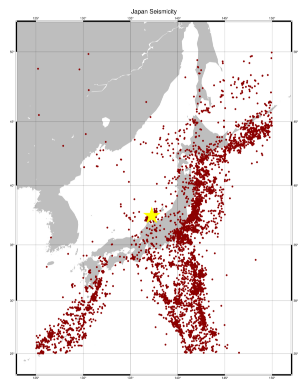

In [5]:
#os.system('./FetchEvent -s 2019-08-01,00:00:00 -e 2024-08-31,00:00:00 --lon 125:150 --lat 25:50 --mag 4:10 -o ./data/whole_japan.txt')
os.system('gmt gmtset PS_MEDIA = archE')
os.system('gmt pscoast -R123/152/23/52 -JM15 -Ba5g5/a5g5:."Japan Seismicity":WESN -Ggray -K > ./postscript/whole_japan.ps')
os.system("awk -F'|' '{print $4,$3}' ./data/whole_japan.txt | gmt psxy -R -J -Sc0.1 -Gred4 -O -K >> ./postscript/whole_japan.ps")
os.system('echo 137.264 37.489 | gmt psxy -R -J -Sa1 -Gyellow -O >> ./postscript/whole_japan.ps')
os.system('gmt psconvert ./postscript/whole_japan.ps -A -Tg')
plot_whole_japan=img.imread('./postscript/whole_japan.png')
plt.axis('off')
plt.imshow(plot_whole_japan)
plt.show()
plt.close()

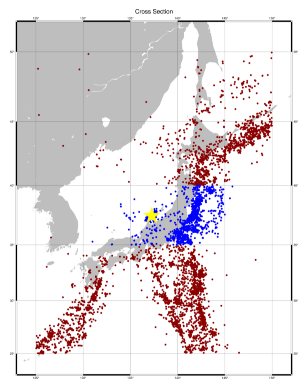

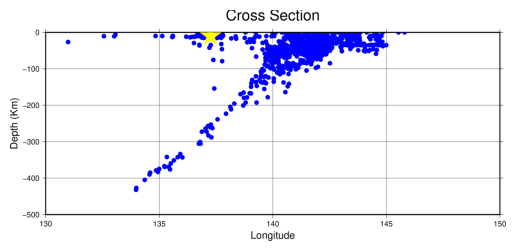

In [6]:
#os.system('./FetchEvent -s 2019-08-01,00:00:00 -e 2024-08-31,00:00:00 --lon 130:150 --lat 35:40 --mag 4:10 -o ./data/crosec.txt')
os.system('gmt gmtset PS_MEDIA = archE')
os.system('gmt pscoast -R123/152/23/52 -JM15 -Ba5g5/a5g5:."Cross Section":WESN -Ggray -K > ./postscript/crosec.ps')
os.system("awk -F'|' '{print $4,$3}' ./data/whole_japan.txt | gmt psxy -R -J -Sc0.1 -Gred4 -O -K >> ./postscript/crosec.ps")
os.system("awk -F'|' '{print $4,$3}' ./data/crosec.txt | gmt psxy -R -J -Sc0.1 -Gblue -O -K >> ./postscript/crosec.ps")
os.system('echo 137.264 37.489 | gmt psxy -R -J -Sa1 -Gyellow -O >> ./postscript/crosec.ps')
os.system('gmt psconvert ./postscript/crosec.ps -A -Tg')
plot_crosec=img.imread('./postscript/crosec.png')
plt.axis('off')
plt.imshow(plot_crosec)
plt.show()
plt.close()

os.system("awk -F'|' '{print $4,$5*-1}' ./data/crosec.txt | gmt psxy -R130/150/-500/0 -JX10/4 -Ba5g5:Longitude:/a100g100:'Depth (Km)'::.'Cross Section':WeSn -Sc0.1 -Gblue -K > ./postscript/xsec.ps")
os.system('echo 137.264 -10 | gmt psxy -R -J -Sa0.5 -Gyellow -O >> ./postscript/xsec.ps')
os.system('gmt psconvert ./postscript/xsec.ps -A -Tg')
plot_xsec=img.imread('./postscript/xsec.png')
plt.axis('off')
plt.imshow(plot_xsec)
plt.show()
plt.close()

In [7]:
#os.system('wget -P ./data/ "http://geodesy.unr.edu/gps_timeseries/tenv3/plates/EU/J971.EU.tenv3"')
os.system("awk 'NR>1{print $3,$9}' ./data/J971.EU.tenv3 | gmt minmax")
os.system("awk 'NR>1{print $3,$11}' ./data/J971.EU.tenv3 | gmt minmax")
os.system("awk 'NR>1{print $3,$13}' ./data/J971.EU.tenv3 | gmt minmax")

<Standard Input>: N = 5675	<2009.0021/2024.6653>	<-0.634496/1.339071>
<Standard Input>: N = 5675	<2009.0021/2024.6653>	<0.344105/0.900358>
<Standard Input>: N = 5675	<2009.0021/2024.6653>	<0.015832/1.357207>


0

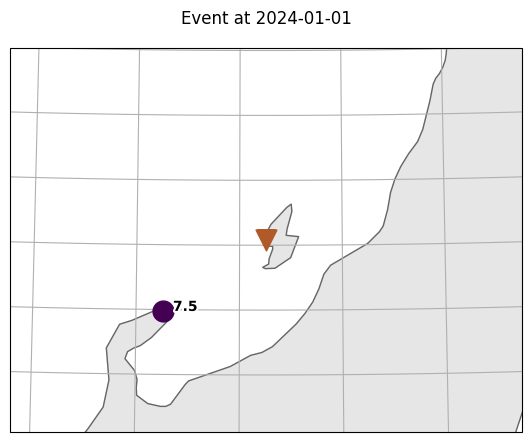

Inventory created at 2024-09-27T01:47:46.142500Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-12-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			JP
		Stations (1):
			JP.JSD (Sado)
		Channels (1):
			JP.JSD..BHZ


In [11]:
# Make sure you take at least a full week (>=7 days) before the first "ban"
start = UTCDateTime("2023-12-04")
# Leaving UTCDateTime() empty means "now":
end = UTCDateTime("2024-01-28")

near_stations = client.get_stations(starttime=start, endtime=end, 
                                    location=' ,00', channel='BHZ', level='channel', 
                                    longitude=eventlongitude, latitude=eventlatitude,
                                    maxradius=1)

fig = near_stations.plot(projection='local', label=False, resolution='h', show=False)
event.plot(projection='local', resolution='h', fig=fig)
plt.close()

In [21]:
network = near_stations[0].code
station = near_stations[0].stations[0].code
location = near_stations[0].stations[0].channels[0].location_code
channel = near_stations[0].stations[0].channels[0].code
dataset = "example"

data_provider = "IRIS"
bans = {"2024-01-01 07:10":'Earthquake Event'}

datelist = pd.date_range(start.datetime, min(end, UTCDateTime()).datetime, freq="D")

BHZ


In [24]:
c = Client(data_provider)

nslc = "{}.{}.{}.{}".format(network, station, location, channel)
# make sure that wildcard characters are not in nslc
nslc = nslc.replace("*", "").replace("?", "")
pbar = tqdm.tqdm(datelist)
for day in pbar:
    datestr = day.strftime("%Y-%m-%d")
    fn = "{}_{}_{}.mseed".format(dataset, datestr, nslc)
    if day != UTCDateTime().datetime and os.path.isfile(fn):
        continue
    else:
        pbar.set_description("Fetching %s" % fn)
        try: 
            st = c.get_waveforms(network, station, location, channel,
                                  UTCDateTime(day)-1801, UTCDateTime(day)+86400+1801,
                                  attach_response=True)
            # the following two lines here prevent a crash when there is no data on a day
            if len(st) > 0:
                st.write(fn)
        except FDSNNoDataException:
            pbar.set_description("No data on FDSN server for %s" % fn)
            continue
        
resp = c.get_stations(UTCDateTime(day), network=network, station=station, location=location,
                      channel=channel, level="response")
print(resp)

  0%|          | 0/56 [00:00<?, ?it/s]

Fetching example_2024-01-28_JP.JSD..BHZ.mseed: 100%|██████████| 56/56 [16:41<00:00, 17.89s/it]


Inventory created at 2024-09-27T02:17:28.095400Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2024-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			JP
		Stations (1):
			JP.JSD (Sado)
		Channels (1):
			JP.JSD..BHZ


In [25]:
force_reprocess = False
pbar = tqdm.tqdm(datelist)
for day in pbar:
    datestr = day.strftime("%Y-%m-%d")
    fn_in = "{}_{}_{}.mseed".format(dataset, datestr, nslc)
    pbar.set_description("Processing %s" % fn_in)
    if not os.path.isfile(fn_in):
        continue
    stall = read(fn_in, headonly=True)
    for mseedid in list(set([tr.id for tr in stall])):
        fn_out = "{}_{}_{}.npz".format(dataset, datestr, mseedid)
        if os.path.isfile(fn_out) and not force_reprocess:
            continue
        st = read(fn_in, sourcename=mseedid)
        st.attach_response(resp)
        ppsd = PPSD(st[0].stats, metadata=resp,
                    ppsd_length=1800, overlap=0.5,
                    period_smoothing_width_octaves=0.025,
                    period_step_octaves=0.0125,
                    period_limits=(0.008, 50),
                    db_bins=(-200, 20, 0.25))
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            ppsd.add(st)
        ppsd.save_npz(fn_out[:-4])
        del st, ppsd
    del stall

Processing example_2023-12-04_JP.JSD..BHZ.mseed:   0%|          | 0/56 [00:00<?, ?it/s] WARNING: FIR normalized: sum[coef]=6.156722E-01;     
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities di

In [26]:
ppsds = {}
pbar = tqdm.tqdm(datelist)
for day in pbar:
    datestr = day.strftime("%Y-%m-%d")
    fn_pattern = "{}_{}_*.npz".format(dataset, datestr)
    pbar.set_description("Reading %s" % fn_pattern)
    for fn in glob(fn_pattern):
        mseedid = fn.replace(".npz", "").split("_")[-1]
        if mseedid not in ppsds:
            ppsds[mseedid] = PPSD.load_npz(fn)#, allow_pickle=True)
        else:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                ppsds[mseedid].add_npz(fn)#, allow_pickle=True)

Reading example_2024-01-28_*.npz: 100%|██████████| 56/56 [00:04<00:00, 13.72it/s]


In [27]:
# Define frequency bands of interest:
freqs = [(0.1,1.0),(1.0,20.0),(4.0,14.0),(4.0,20.0)]

displacement_RMS = {}
for mseedid, ppsd in tqdm.tqdm(ppsds.items()):
    ind_times = pd.DatetimeIndex([d.datetime for d in ppsd.current_times_used])
    data = pd.DataFrame(ppsd.psd_values, index=ind_times, columns=1./ppsd.period_bin_centers)
    data = data.sort_index(axis=1)
    displacement_RMS[mseedid] = seismosocialdistancing.df_rms(data, freqs, output="DISP")
    displacement_RMS[mseedid].to_csv("%s.csv" % mseedid)

100%|██████████| 1/1 [00:07<00:00,  7.56s/it]


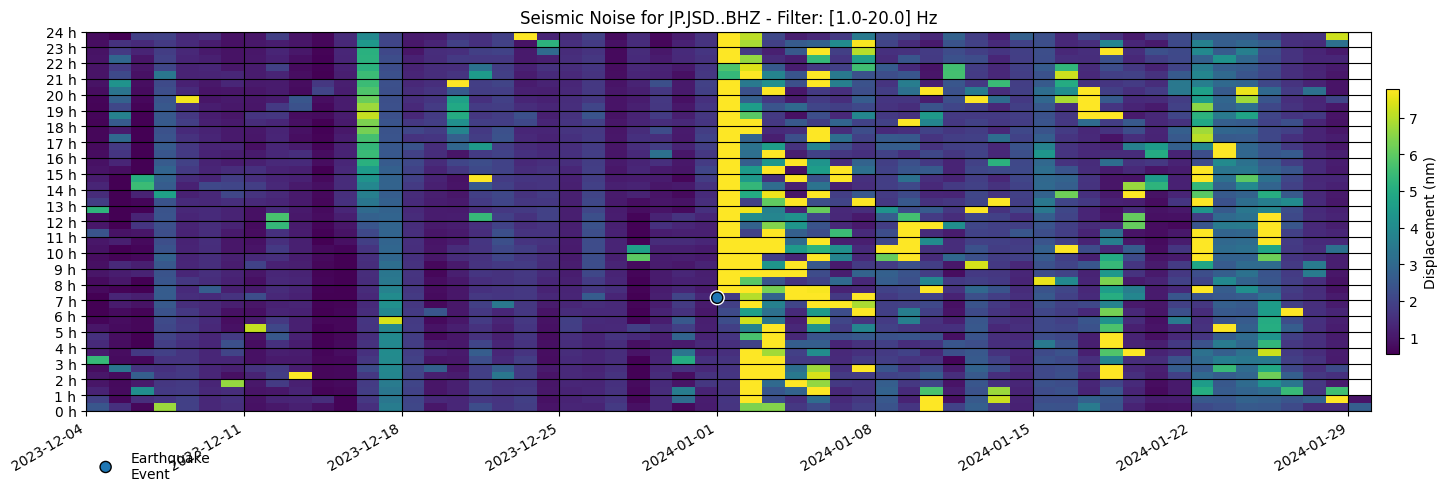

In [41]:
args = {'band':"1.0-20.0",  #"4.0-14.0",       # might be None or commented ("4.0-14.0" per default) or any of the tupples in freqs
        'bans':bans,             # might be None or commented
        'save':'./',              # might be None or commented or a path 
        'unit':'nm'
       }

seismosocialdistancing.plot(displacement_RMS,
                            type='gridmaps',
                            **args)